In [1]:
import pandas as pd
import numpy as np
import operator as op

In [2]:
df = pd.read_csv("Manaus.csv", encoding = "ISO8859-1", sep = ";", low_memory = False)

In [3]:
#Visualizando dataset
df.head()

,_idade,_faixa etária,_sexo,_bairro,_classificacao,_comorb_renal,_comorb_diabetes,_comorb_imuno,_comorb_cardio,_conclusao,...,_distrito,_bairro_mapa,_comorb_respiratoria,_comorb_cromossomica,_comorb_hepatica,_comorb_neurologica,_comorb_hemato,_comorb_obessidade,_origem,_evolução
0,35.0,30a - 39a,F,COROADO,Descartado,Não,Não,Não,Não,Recuperado,...,LESTE,COROADO,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
1,30.0,30a - 39a,M,JAPIIM,Confirmado,Não,Não,Não,Não,NaN,...,SUL,JAPIIM,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
2,30.0,30a - 39a,M,FLORES,Confirmado,Não,Não,Não,Não,NaN,...,SUL,FLORES,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
3,54.0,50a - 59a,M,TANCREDO NEVES,Em análise,Não,Não,Não,Não,Recuperado,...,LESTE,TANCREDO NEVES,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
4,43.0,40a - 49a,F,FLORES,Confirmado,Não,Não,Não,Não,NaN,...,SUL,FLORES,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN


In [4]:
#Removendo casos não confirmados

In [5]:
filtro  = df['_classificacao'] == "Confirmado"
confirmados = df[filtro]
df = confirmados

In [6]:
#Quantidade de linhas e colunas
df.shape

(37637, 36)

In [7]:
#Quais são os atributos
df.columns

Index(['_idade', '_faixa etária', '_sexo', '_bairro', '_classificacao',
       '_comorb_renal', '_comorb_diabetes', '_comorb_imuno', '_comorb_cardio',
       '_conclusao', '_dt_notificacao', '_taxa', '_dt_evolucao', '_raca',
       '_dt_sintomas', '_criterio', '_tipo_teste', '_sintoma_garganta',
       '_sintoma_dispneia', '_sintoma_febre', '_sintoma_tosse',
       '_sintoma_outros', '_etnia', '_profiss_saude', '_srag',
       '_se_notificacao', '_distrito', '_bairro_mapa', '_comorb_respiratoria',
       '_comorb_cromossomica', '_comorb_hepatica', '_comorb_neurologica',
       '_comorb_hemato', '_comorb_obessidade', '_origem', '_evolução'],
      dtype='object')

In [8]:
#Quantidade de casos confirmados

In [9]:
df.shape

(37637, 36)

In [10]:
#Caso mais antigo e mais novo

In [11]:
df['_dt_notificacao'] = pd.to_datetime(df['_dt_notificacao'], format="%d/%m/%Y")

In [12]:
df['_dt_notificacao'].min()

Timestamp('2020-02-16 00:00:00')

In [13]:
df['_dt_notificacao'].max()

Timestamp('2020-08-10 00:00:00')

In [14]:
#Excluindo colunas desnecessarias

In [15]:
confirmados = df.drop(df.columns[[1,5,6,7,8,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]], axis = 1)
df = confirmados
df.columns

Index(['_idade', '_sexo', '_bairro', '_classificacao', '_conclusao',
       '_dt_notificacao', '_tipo_teste'],
      dtype='object')

In [16]:
#Excluindo linhas com dados faltando
df.dropna(inplace=True)

In [36]:
#Quantos exemplos e atributos há na base de dados apos limpeza
df.shape

(11219, 7)

In [18]:
total = df.shape[0]

In [19]:
#Qtde Recuperados
rec = (df._conclusao == 'Recuperado').sum()
rec

10051

In [20]:
#Porcentagem de recuperados
rec / total

0.895890899367145

In [21]:
#Os casos acomenteram mais indivíduos masculinos(M) ou femeninos(F)?
df['_sexo'].value_counts()

F    5755
M    5464
Name: _sexo, dtype: int64

In [22]:
#Média de idade dos infectados
np.mean(df['_idade'])

45.758980301274626

In [23]:
#Desvio padrão da idade dos acometidos
np.std(df['_idade'])

17.38249686667999

In [24]:
#Doente mais novo
np.min(df['_idade'])

0.0

In [25]:
#Doente mais velho
np.max(df['_idade'])

118.0

In [26]:
#Qual o bairro com maior incidência de dados
counts = df['_bairro'].value_counts().to_dict()
sortedDict = sorted(counts.items(), key=op.itemgetter(1), reverse=True)
sortedDict[0]

('CIDADE NOVA', 552)

In [27]:
#3 bairros com mais recuperados
filtro = df['_conclusao'] == 'Recuperado'
oo = df[filtro]
counts = oo['_bairro'].value_counts().to_dict()
sortedDict1 = sorted(counts.items(), key=op.itemgetter(1), reverse=True)
print(sortedDict1[0])
print(sortedDict1[1])
print(sortedDict1[2])

('CIDADE NOVA', 473)
('FLORES', 370)
('CENTRO', 302)


In [28]:
#Quais os tipos de testes efetuados nos pacientes e o percentual
tipoteste = df.groupby(by='_tipo_teste').size()
for i, v in tipoteste.items():
    print( i, 'value: ', v / len(df))



ECLIA IgG value:  0.0003565380158659417
ELISA IgM value:  0.0006239415277653979
RT-PCR value:  0.6326767091541136
TESTE RÁPIDO - ANTICORPO value:  0.2790801319190659
TESTE RÁPIDO - ANTÍGENO value:  0.08726267938318923


In [29]:
#Letalidade
lt= (df._conclusao == 'Óbito').sum()
print('%.2f' % (lt / len(df)))

0.10


In [30]:
#Correlação de Pearson entre idades e num de casos
pearson = df.groupby(by='_idade').size()
a = []
b = []
for i, v in pearson.items():
    a.append(i)
    b.append(v)

def pearson(tamanho, idades, numcasos):
    # Primeiro, calculamos a média das idades "/x"
    media_idades = float(sum(idades)) / len(idades)
    # Calculamos também a média das listas dos números de casos "/y"
    media_numcasos = float(sum(numcasos)) / len(numcasos)

    # Para facilitar, vamos dividr nossa equação em três partes:
    # p_cima condiz com o somatório de cima na divisão de p
    # p_baixo_prova condiz com o somatório abaixo na divisão de p (relacionado a "x")
    # p_baixo_exercicio condiz com o somatório abaixo na divisão de p (relacionado a "y")
    p_cima = 0
    p_baixo_prova = 0
    p_baixo_exercicio = 0

    # Como as mesmas variáveis serão utilizadas para os três somatórios da equação, vamos iterar cada valor ao mesmo tempo
    # A função zip() do Python nos permite iterar em um laço de repetição os valores de duas listas (de tamanhos iguais) ao mesmo tempo
    for nota_prova, nota_exercicio in zip(idades, numcasos):
        # Realizamos o somatório de p_cima passo-a-passo, somando o valor já existente com os valores seguintes
        p_cima = p_cima + ((nota_prova - media_idades) * (nota_exercicio - media_numcasos))
        # Realizamos o mesmo procedimento para os somatórios de baixo
        # Repare que para realizar a potência por dois em cada somatório utilizamos ** 2 (** é o operador de potência em Python)
        p_baixo_prova = p_baixo_prova + ((nota_prova - media_idades) ** 2)
        p_baixo_exercicio = p_baixo_exercicio + ((nota_exercicio - media_numcasos) ** 2)

    # Por fim, dividimos o valor de cima pela raiz da multiplicação dos valores de baixo:
    # Em português: p_cima dividido pela raiz da multiplicação de p_baixo_prova por p_baixo_exercicio
    p = p_cima / ((p_baixo_prova * p_baixo_exercicio) ** (1/2.0))
    # Note que para qualquer número elevado ao seu inverso, o resultado é a sua raiz. Por isso calculamos a raiz através da potência utilizando ** (1/2.0)
    # Com isso nós não precisamos usar uma biblioteca externa, como math ou numpy. Usamos 2.0 ao invés de 2 porque no Python2 o retorno seria 0, o que não resultaria na raiz da equação.

    # Retornamos o valor "p" encontrado
    return p

# Invocamos nosso método pearson(n, x, y), passando como parâmetro o tamanho da lista, e os valores de cada uma delas.
resultado = pearson(len(a), a, b)
# Usamos a notação %.4f para retornar apenas os 4 primeiros digitos após o ponto (no caso da notação brasileira, após a vírgula)
print('%.4f' % resultado)

-0.2345


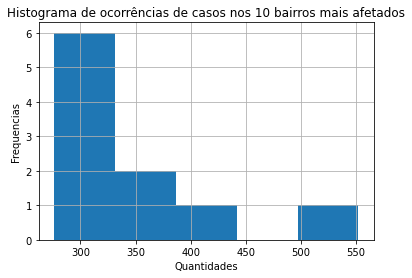

In [31]:
import matplotlib.pyplot as plt
temp = pd.DataFrame(data=sortedDict)
temp[0:10].hist(bins=5)
plt.title('Histograma de ocorrências de casos nos 10 bairros mais afetados')
plt.xlabel('Quantidades')
plt.ylabel('Frequencias')
plt.show()

                               

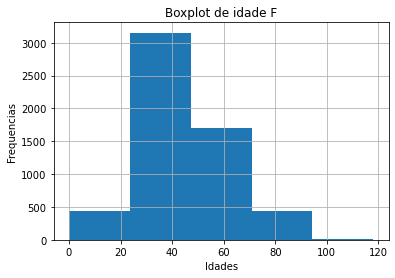

In [32]:
#boxplot da idade dos acometidos femenino
filtro = df['_sexo'] == 'F'
oo = df[filtro]

oo['_idade'].hist(bins=5)
plt.title('Boxplot de idade F')
plt.xlabel('Idades')
plt.ylabel('Frequencias')
plt.show()

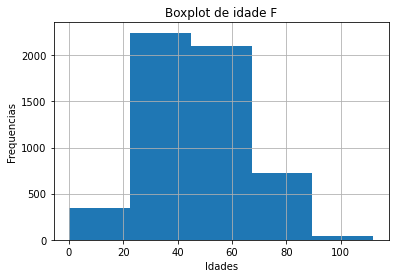

In [33]:
#boxplot da idade dos acometidos masculino
filtro = df['_sexo'] == 'M'
oo = df[filtro]

oo['_idade'].hist(bins=5)
plt.title('Boxplot de idade F')
plt.xlabel('Idades')
plt.ylabel('Frequencias')
plt.show()

In [34]:
#casos nos ultimos dez dias registrados
counts = df['_dt_notificacao'].value_counts().to_dict()
sortedDict = sorted(counts.items(), key=op.itemgetter(0), reverse=True)
sortedDict

[(Timestamp('2020-08-04 00:00:00'), 1),
 (Timestamp('2020-07-31 00:00:00'), 1),
 (Timestamp('2020-07-30 00:00:00'), 2),
 (Timestamp('2020-07-28 00:00:00'), 1),
 (Timestamp('2020-07-27 00:00:00'), 2),
 (Timestamp('2020-07-26 00:00:00'), 1),
 (Timestamp('2020-07-24 00:00:00'), 4),
 (Timestamp('2020-07-22 00:00:00'), 3),
 (Timestamp('2020-07-21 00:00:00'), 1),
 (Timestamp('2020-07-20 00:00:00'), 3),
 (Timestamp('2020-07-17 00:00:00'), 1),
 (Timestamp('2020-07-16 00:00:00'), 2),
 (Timestamp('2020-07-15 00:00:00'), 1),
 (Timestamp('2020-07-13 00:00:00'), 1),
 (Timestamp('2020-07-10 00:00:00'), 23),
 (Timestamp('2020-07-09 00:00:00'), 33),
 (Timestamp('2020-07-08 00:00:00'), 42),
 (Timestamp('2020-07-07 00:00:00'), 36),
 (Timestamp('2020-07-06 00:00:00'), 38),
 (Timestamp('2020-07-05 00:00:00'), 12),
 (Timestamp('2020-07-04 00:00:00'), 13),
 (Timestamp('2020-07-03 00:00:00'), 42),
 (Timestamp('2020-07-02 00:00:00'), 40),
 (Timestamp('2020-07-01 00:00:00'), 52),
 (Timestamp('2020-06-30 00:00: